In [2]:
#under this we will analye airport arrival of the International tourist and gauge our airport marketing strategy (Table 9)

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches

In [19]:
df = pd.read_excel("Data from 2019-2022 excel files (copy)/Tourism-Statistics-for-year-2022.xlsx" ,sheet_name = "Table 9", skiprows = 2)

In [20]:
#converting the right columns

df.columns = ["NaN","Airports","FTA arrivals","%Share"]

In [21]:
#droping the unwanted rows and columns 

df.drop("NaN",axis = 1, inplace = True) 
df.dropna(inplace = True)
df = df[~df["Airports"].str.contains("Total FTAs from Air\nMode")]

In [22]:
#reducing the FTA arrivals to thousands 

df.loc[:, "FTA arrivals"] = np.round(df["FTA arrivals"] / 1000,2)

In [25]:
#extraction before plotting 

airports = df["Airports"]
fta = df["FTA arrivals"]
share_22 = df["%Share"]

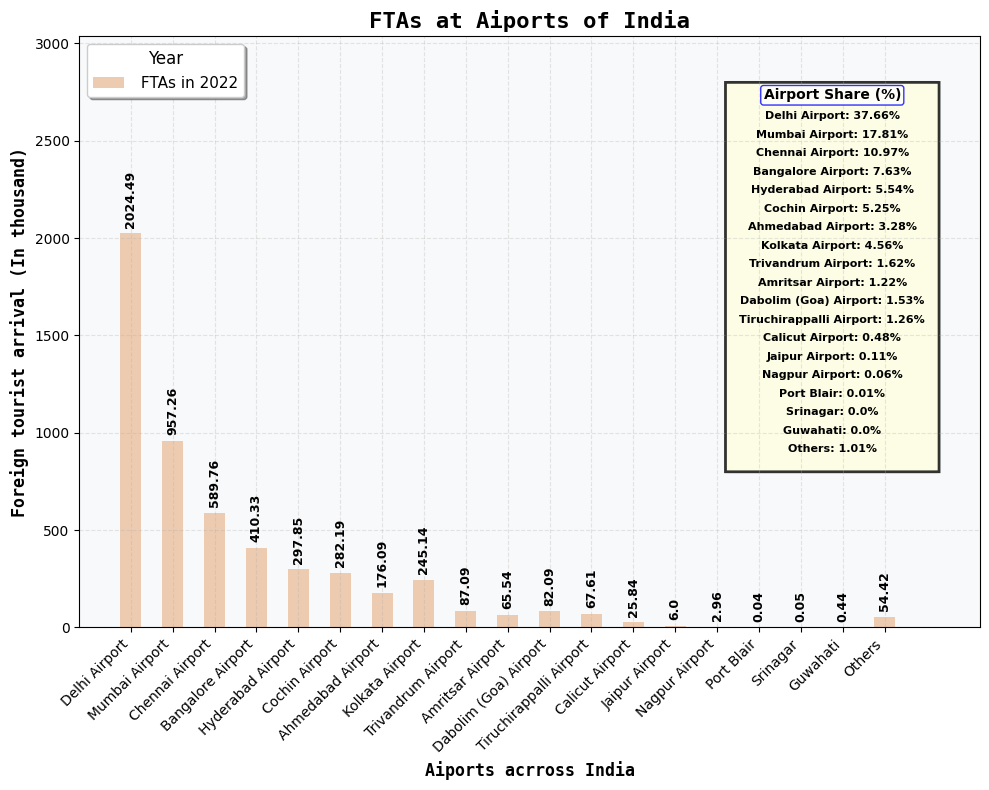

In [81]:
#plotting the bar graph for this 

plt.figure(figsize = (10,8))
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'sans-serif']

#plotting the bar graph 
width = 0.5
bars1 = plt.bar(airports, fta, width = width,color = "#EDCBB1" ,label = " FTAs in 2022")

#annotation 
def add_value_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 30,
                f'{value}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', rotation=90)

# Apply value labels to all bar groups
add_value_labels(bars1, fta)

#this will help in adding the percentage box

def add_value_percent_curved(airports, values):
    # Calculate position for the curved rectangle box
    x_start = 14.5
    y_start = 2800
    box_width = 4.5
    box_height = len(airports) * 100 + 100
    
    # Create curved rectangle using FancyBboxPatch
    curved_box = patches.FancyBboxPatch(
        (x_start, y_start - box_height), box_width, box_height,
        boxstyle="round,pad=0.3",  # Creates curved corners
        facecolor='lightyellow',
        edgecolor='black',
        linewidth=2,
        alpha=0.8
    )
    plt.gca().add_patch(curved_box)
    
    # Add title for the percentage box
    plt.text(x_start + box_width/2, y_start - 30, 'Airport Share (%)', 
             ha='center', va='top', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.2', 
                       facecolor='white', 
                       edgecolor='blue',
                       alpha=0.8))
    
    # Add percentage values with highlighted airport names
    height = y_start - 200
    for airport, value in zip(airports, values):
        # Highlight airport names using different styling
        plt.text(x_start + box_width/2, height,
                f'{airport}: {value}%', ha='center', va='bottom', 
                fontsize=8, fontweight='bold')
        height -= 95


add_value_percent_curved(airports,share_22)

#customization 
plt.xticks(airports,rotation = 45, ha = "right")
plt.title("FTAs at Aiports of India" , fontfamily = "monospace",fontweight = "bold", fontsize = 16)
plt.xlabel("Aiports acrross India" , fontfamily = "monospace",fontweight = "bold", fontsize = 12)
plt.ylabel("Foreign tourist arrival (In thousand)" , fontfamily = "monospace",fontweight = "bold", fontsize = 12)

plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, 
           fontsize=11, title="Year", title_fontsize=12)

#graphical needs 
plt.grid(True, alpha = 0.3, linestyle = "--")
plt.tight_layout()

plt.ylim(0, max(fta) * 1.5)

# Add background color
plt.gca().set_facecolor('#f8f9fa')

#saving the plot 

plt.savefig('FTAs at Airports of India.png', 
            dpi=300,                    # High resolution
            bbox_inches='tight',        # Remove extra whitespace
            facecolor='white',          # White background
            edgecolor='none',           # No border
            pad_inches=0.1)             # Small padding

In [23]:
df

,Airports,FTA arrivals,%Share
0,Delhi Airport,2024.49,37.66
1,Mumbai Airport,957.26,17.81
2,Chennai Airport,589.76,10.97
3,Bangalore Airport,410.33,7.63
4,Hyderabad Airport,297.85,5.54
5,Cochin Airport,282.19,5.25
6,Ahmedabad Airport,176.09,3.28
7,Kolkata Airport,245.14,4.56
8,Trivandrum Airport,87.09,1.62
9,Amritsar Airport,65.54,1.22
